In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
heart_df=pd.read_csv('/content/heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [65]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [66]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [67]:
corr=heart_df.corr()
corr['HeartDisease'][:-1]

Age            0.282039
RestingBP      0.107589
Cholesterol   -0.232741
FastingBS      0.267291
MaxHR         -0.400421
Oldpeak        0.403951
Name: HeartDisease, dtype: float64

In [68]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [69]:
heart_cat=heart_df.select_dtypes(include='object')
heart_cat

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [70]:
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(heart_cat)
print(result)

[[1. 1. 1. 0. 2.]
 [0. 2. 1. 0. 1.]
 [1. 1. 2. 0. 2.]
 ...
 [1. 0. 1. 1. 1.]
 [0. 1. 0. 0. 1.]
 [1. 2. 1. 0. 2.]]


In [71]:
heart_cate=pd.DataFrame(result)
heart_cate.columns=["Sex", "Chestpaintype", "RestingEcq", "Exerciseangina","ST_slope"]

In [72]:
heart_cate.head()

,Sex,Chestpaintype,RestingEcq,Exerciseangina,ST_slope
0,1.0,1.0,1.0,0.0,2.0
1,0.0,2.0,1.0,0.0,1.0
2,1.0,1.0,2.0,0.0,2.0
3,0.0,0.0,1.0,1.0,1.0
4,1.0,2.0,1.0,0.0,2.0


In [73]:
heart_df.shape

(918, 12)

In [74]:
heart_cate.shape

(918, 5)

In [75]:
heart_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             918 non-null    float64
 1   Chestpaintype   918 non-null    float64
 2   RestingEcq      918 non-null    float64
 3   Exerciseangina  918 non-null    float64
 4   ST_slope        918 non-null    float64
dtypes: float64(5)
memory usage: 36.0 KB


In [77]:
heart = pd.concat([heart_df,heart_cate],axis='columns',ignore_index=False)
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex,Chestpaintype,RestingEcq,Exerciseangina,ST_slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1.0,1.0,1.0,0.0,2.0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0.0,2.0,1.0,0.0,1.0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1.0,1.0,2.0,0.0,2.0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.0,0.0,1.0,1.0,1.0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1.0,2.0,1.0,0.0,2.0


In [78]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
Sex               0
Chestpaintype     0
RestingEcq        0
Exerciseangina    0
ST_slope          0
dtype: int64

In [82]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex,Chestpaintype,RestingEcq,Exerciseangina,ST_slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1.0,1.0,1.0,0.0,2.0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0.0,2.0,1.0,0.0,1.0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1.0,1.0,2.0,0.0,2.0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.0,0.0,1.0,1.0,1.0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1.0,2.0,1.0,0.0,2.0


In [84]:
heart.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True)
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Chestpaintype,RestingEcq,Exerciseangina,ST_slope
0,40,140,289,0,172,0.0,0,1.0,1.0,0.0,2.0
1,49,160,180,0,156,1.0,1,2.0,1.0,0.0,1.0
2,37,130,283,0,98,0.0,0,1.0,2.0,0.0,2.0
3,48,138,214,0,108,1.5,1,0.0,1.0,1.0,1.0
4,54,150,195,0,122,0.0,0,2.0,1.0,0.0,2.0


In [86]:
heart.iloc[:,6]

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [87]:
X=heart.drop(['HeartDisease'],axis=1)
X.dropna(inplace=True)
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Chestpaintype,RestingEcq,Exerciseangina,ST_slope
0,40,140,289,0,172,0.0,1.0,1.0,0.0,2.0
1,49,160,180,0,156,1.0,2.0,1.0,0.0,1.0
2,37,130,283,0,98,0.0,1.0,2.0,0.0,2.0
3,48,138,214,0,108,1.5,0.0,1.0,1.0,1.0
4,54,150,195,0,122,0.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,3.0,1.0,0.0,1.0
914,68,144,193,1,141,3.4,0.0,1.0,0.0,1.0
915,57,130,131,0,115,1.2,0.0,1.0,1.0,1.0
916,57,130,236,0,174,0.0,1.0,0.0,0.0,1.0


In [88]:
Y=heart.iloc[:,6]
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [120]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [121]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2)

In [92]:
model=LogisticRegression(verbose=1)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [93]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0
 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1]

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        72
           1       0.86      0.88      0.87       112

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [97]:
print(f'Accuracy = {accuracy_score(y_test, predictions):.2f}\nRecall = {recall_score(y_test, predictions):.2f}\n')

Accuracy = 0.84
Recall = 0.88



In [109]:

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(x_train, y_train)
test_pred = rfcl.predict(x_test)
rfcl_score=rfcl.score(x_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))


The Random forest model accuracy is 0.842391304347826


In [115]:
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score

#Implementing cross validation

k = 5
kf = KFold(n_splits=k, random_state=None)
model = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.8967391304347826, 0.8695652173913043, 0.907608695652174, 0.7868852459016393, 0.7595628415300546]
Avg accuracy : 0.8440722261819908


In [127]:
from sklearn.naive_bayes import GaussianNB
nvclassifier= GaussianNB()
nvclassifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [128]:
y_pred=nvclassifier.predict(x_test)

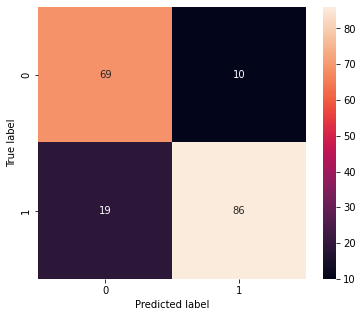

In [130]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [131]:
a=cm.shape
corrPred=0
falsePred=0
for row in range(a[0]):
  for c in range(a[1]):
    if row==c:
      corrPred +=cm[row,c]
    else:
      falsePred +=cm[row,c]
print('Correct predictions:',corrPred)
print('False predictions:',falsePred)


Correct predictions: 155
False predictions: 29


In [132]:
acc=corrPred/cm.sum()
round(acc*100,2)


84.24